# Diverge package Quick Start
## Description
DIVERGE is a python packages for phylogeny-based analyses of protein family evolution and functional divergence. It was designed to detect functional divergence between member genes of a protein family, based on (site-specific) shifted evolutionary rates after gene duplication or speciation. In our previous study, we recognized two types of functional divergence. 
And we use posterior analysis results in a site-specific profile for predicting important amino acid residues that are responsible for functional divergence.

In [2]:
import diverge
print(diverge.__version__)

1.0.0


## Input Data Types and File Format

The input files of DIVERGE software are: 
<br>
1) a multiple alignment of amino acid sequences 
2) a tree file with the evolutionary relationships of the sequences from the alignment file

### The Multiple Alignment File(Required)

The alignment file must be in either **FASTA or CLUSTAL format** and contain as many as sequences as required. 
#### CLUSTAL Format
The CLUSTAL format is exactly the output file from the alignment software CLUSTAL. These files normally have the extension .aln. An example of a CLUSTAL aligned file follows. Notice the first line in the example. This line is read by the software to help determine the format of the alignment file. If the word "CLUSTAL" is in the first line the software assumes the file is in CLUSTAL format. If the alignment file is coming from another source and is in this format, you can get the software to read the alignment file by adding CLUSTAL to the top line of the file.
```
CLUSTAL W (1.7) multiple sequence alignment
HSU60521.MCH6 ---------------------
CELCED3A.CED-3  ------------MMRQDRRSLLERNIMMFSSHLKVDEILEVLIAKQVLNSD
HSU60521.MCH6  ----MDEADRRLLRRCRLRLVEELQVDQLWDALLSSELFRPHMIEDIQRAGSGSRRDQAR
CELCED3A.CED-3  NGDMINSCGTVREKRREIVKAVQRRGDVAFDAFYDALRSTGHEGLAEVLEPLARSVDSNA
```
Only amino acid alignment is allowed in the current version. Gaps (-) in the alignment are allowed. (**example file**:[CASP.aln](./test_data/CASP.aln))
#### FASTA Format
The FASTA format may contain sequences that are split over numbers of lines or sequences that are on one long line or a mixture. If the sequences are of varying lengths (unaligned), the file will not be loaded and an error message is displayed. FASTA files typically have the extension .fasta. An example of the FASTA follows:
```
>Amazon_molly_ERBB3b
---------------------------------------------------------------------MSVSMDQQQVLLLCVALSWRIHTGSAQSHEEVCPGTQNGLSSTGSQETQYNLIKDRYSGCEIIMGNLEITQIES----------------------NWDFSFLKTIREVTGYVLIAMNHVQEIPLGQLRVIRGNSLYERRFALSVFFNYPK----------EGSNGLRQLGLLNLT-EILEGGVQIINNKFLSYGP--SIFWQDILRDN-----SAPIDIQNNG----ERGPCHKSCGD-------YCWGPNKDQCQI-LTKMVCAPQCNGRCFGRSPRDCCHIECA--AGCKGPLDEDCFACRHFNDSGACVPQCPQTLIYNKQTFQMETNPNAKYQYGSICVSQCPTHFVVDGSS---CVSVCPPDKTEMERDG-----QRQCELCSG-FCPKV----CNGTGAEH--------RQTVDSSNIDSFINCTKIQGSLHFLVTGIHGDDFKNI--------PPLDAKKLEVFRTVREIT-----DILNIQSWPKELNNLSVFSSLTTIQGRSLHKR------FSLMVIHIPTLTSLGLRSLRYINDGSVYISQNANLCYHHTVNWTQLFRGR--RVR---VNNLNNNKPLAECVAEGRVCDPLCSDAGCWGPGPDQCLTCRNYSRHGTCVGSCNFLSGDK--------------------------------------------------REFARSDEECAACHPECKPQR--GK-VSCTGTGADECVACSNLQ-DGPYCMSSCPAGVL---------------------------------------------------------------DEHRGLIFKYPNKE-----------GHCEPCHPNCTHG------------------------------------------------CVGPGLNDCKISG--------------------------------------------------------GSGQITGIALAVPACLIFCLGLFFLGVLYHRGLAIRRKRAMRRYLESGESFEPLGS-GEKGTKVFARILRPSELKKIKLLGYGVFGTVHKGFWTPE-GETVKIPVAIKTIQDSSGRQTFTEITDHMLSMGSLDYPYIVRLLGICPGPS-LQLVTQLSPRG--SLLEHIRQHK--NSLDPQRLLNWCVQIAK-GMFYLEEHRMVHRNLAARNVLLKNDYQVQISDYGVADLLYPDDKKYVYTDTKTP-IKWMALESILFRRYTHQSDVWSYG------VTVWEMMSFGAEPYMSVQPQEVPSLLEKGERLSQPHICTIDVYMVMVKCWMIDENVRPTFKELASDFTRMARDPHRYLVIK---EGEDAPPGEIHRRESERGLLDA--DLE---DADEEGLDDGLTTP--------PLQHSPSWSLSRSRIN----------------------SCRSGVSQPGPTGYLPMTPSPAD----NIRQLWF----------------HRSRLSSVRTLPERS----EVRGNGRE----AEGLRAGSLRRAR------------------------------LGSERTSPRVALSRHRKLSTASSPSSYKVWTAQEDEEELDHYGYVLPGSPETPE--RST--------------------KSNQILEACEG-----------------------------------------------------------AAANQRDGTEKDQLHCRREIQSVDHKAEVDRGTCRYEYMD-----------------IRHSDSSEGGESELERCGSQTSSTTGAETDQTAGGSVKERKGEEETEICHTN-------------------------------------------------------------------------------------------------------------KQAAVPEDPSGGVVPGADVSAAGDGTVEEYEEMSRFEKVPGERGHAEYENLPAKARAVPKETDSDRCAGIGEYIKVCTGIREPSNNTSFDNPDYWHSRLFLKPDAVRT*-
```
### The Tree File(Required)
You can build an phylogenetic tree any way you like, and select clusters that interest you for DIVERGE calculations. You need to extract these clusters into subtrees and take them as input in Newick format.
The details of Newick format are as demonstrated below. The string representing the tree may be all contained on a single line or broke over a number of lines. Branch lengths (either floating point or integer values) are allowed and read if available. 
```
Example without branch lengths:
(((AF111345,HSU60519.MCH4),HSU86214.PE1),(HSCASP8S8.CASP8,MMCASP8 S7.PE1)));
Example with branch lengths:
(((AF111345:.012,HSU60519.MCH4:.453):.345,HSU86214.PE1:.543):.546,(HSCASP8S8.CASP8:.954,MMCASP8S7.PE1:.42):.65); 
```
**NOTE:**
Please check your tree file. It is important to note that we usually pay more attention to the leaf nodes. The internal nodes and root node are only used to display the hierarchical structure of the tree, and their names are not very important. Therefore, please **delete their(internal nodes and root nodes) names** in advance, otherwise it may cause the program to crash.

## Fully automatic pipeline

In [3]:
from diverge import CalPipe
from diverge.utils import view_cutoff_msa
pipeline = CalPipe("./test_data/CASP.aln","./test_data/cl1.tree","./test_data/cl2.tree","./test_data/cl3.tree")
pipeline

Diverge calculation pipeline
step1: Gu99
step2: Type2
step3: Fdr
step4: FunDist
step5: Type1Analysis
step6: Asym
#####################
You can get the result by calling the result_summary attribute or the specific attribute as follow:
 dict_keys(['gu99_summary', 'gu99_results', 'type1analysis_summary', 'type1analysis_results', 'type2_summary', 'type2_results', 'type1_fdr', 'type2_fdr', 'fundist_results', 'asym_results'])

### visit specific attribute
You can access `pipeline.result_summary` to get all results.

In [2]:
pipeline.result_summary

{'gu99_summary':               cl1/cl2    cl1/cl3   cl2/cl3
 MFE Theta    0.428730   0.532503  0.205797
 MFE se       0.137802   0.153982  0.175487
 MFE r X      0.273899   0.207522  0.295111
 MFE r max    0.479456   0.443899  0.371582
 MFE z score -3.376846  -3.730951 -1.205411
 ThetaML      0.412800   0.512800  0.019400
 AlphaML      1.111486   0.956182  1.886836
 SE Theta     0.131543   0.138874  0.154832
 LRT Theta    9.847951  13.634986  0.015699,
 'gu99_results':       cl1/cl2   cl1/cl3   cl2/cl3
 288  0.346385  0.446039  0.013425
 289  0.478965  0.552028  0.016414
 290  0.346385  0.706919  0.060230
 291  0.470638  0.552028  0.016489
 292  0.527260  0.552028  0.016420
 ..        ...       ...       ...
 566  0.421239  0.519342  0.017674
 569  0.346385  0.519342  0.020199
 570  0.480193  0.519342  0.018259
 571  0.346385  0.519342  0.020199
 572  0.346385  0.519342  0.020199
 
 [199 rows x 3 columns],
 'type1analysis_summary':              cl1/cl2    cl1/cl3   cl2/cl3
 Parameters 

In [30]:
pipeline.result_summary.keys()

dict_keys(['gu99_summary', 'gu99_results', 'type1analysis_summary', 'type1analysis_results', 'type2_summary', 'type2_results', 'type1_fdr', 'type2_fdr', 'fundist_results', 'asym_results'])

And you can also access the results of a particular computation function by accessing specific parameters. 
<br>
For example，if you want to get the gu99 calculation result，you can call `pipeline.gu99_results` to get it.

In [31]:
pipeline.gu99_results

,cl1/cl2,cl1/cl3,cl2/cl3
288,0.346385,0.446039,0.013425
289,0.478965,0.552028,0.016414
290,0.346385,0.706919,0.060230
291,0.470638,0.552028,0.016489
292,0.527260,0.552028,0.016420
...,...,...,...
566,0.421239,0.519342,0.017674
569,0.346385,0.519342,0.020199
570,0.480193,0.519342,0.018259
571,0.346385,0.519342,0.020199


## Independent computing process
You can also do independent computing process to setup your custom pipeline. The specific functions are as follows:
|Function|Description|
|-----|-----|
|Gu99|Detect type-I functional divergence by Gu(1999) method.|
|Gu2001|Detect type-I functional divergence by Gu(2001) method.<br />Need phylogenetic tree file to contain branch length data.|
|Type-II Divergence|Detect type-II functional divergence of gene family|
|Rate variation among sites(RVS)|Estimate the among-site rate variations for given cluster as described in Gu and Zhang(1997).<br />**only ONE cluster is allowed in one run**|
|Functional Distance Analysis|Estimate the type I functional distance for each pair of clusters and show the type I functional branch length of each cluster when at least three homologous gene clusters are available.<br />**Need to select at least three clusters**|
|FDR for predictions|The calculation of the false discovery rate of functionally diverging sites.|
|Asymmetric test for type-I functional divergence|Statistically testing whether the degree of type I functional divergence differs between two duplicate genes.<br />**Need to select just three clusters**|
|Effective number of sites related to functional divergence(type I or type II)|Estimate effectively the number of sites related to type I and type II functional divergences, which is insensitive to the cutoff.<br />**Need to select just two clusters**|
|Gene-specific type I analysis|Site-specific posterior profiles for predicting gene-specific type I functional divergence-related sites<br />**Need to select just three clusters**|
### Type-I Divergence Calculation
Calculation of type-I divergence contain two methods:`diverge.Gu99` and `diverge.Gu2001`.
#### Gu99
You can straightly import gu99 calculation module from diverge pacakge and add the required file for calculation.

In [1]:
from diverge import Gu99
gu99 = Gu99("./test_data/CASP.aln","./test_data/cl1.tree","./test_data/cl2.tree","./test_data/cl3.tree")

You can get statistical parameter result of gu99 calculation by calling `gu99.summary`.
<br>
**The detail interpretations of parameters are as follow**:
|Parameters|Interpretations|
|:----|:----|
|MFE Theta|Estimate of $\theta_1$ by the model-free method|
|MFE se|Standard error of the $\theta_1$ estimated by MFE|
|MFE r_X|The observed coefficient of correlation between two gene clusters|
|MFE r_max|The expected maximum coefficient of correlation between two gene clusters|
|MFE z-score|The z-score for the model-free estimate of $\theta_1$ after Fisher’s transformation|
|ThetaML|Maximum likelihood estimate of $\theta_1$.|
|AlphaML|Maximum likelihood estimate of $\alpha$(the gamma parameter for the among-site rate variation)|
|SE Theta|Standard error of the maximum likelihood estimate of $\theta_1$|
|LRT Theta|The (log) score for the likelihood ratio test against the null $\theta_1$=0|

**NOTE:**
- Note that MFE z-score is usually negative, so the user has to use its absolute value to obtain the p-value from the Z-core test.
- The value of LRT Theta in the output is the log-score so that it approximately follows a chi-square distribution with one degree of freedom.
- Although it is simple, the "model free" method requires that each gene cluster should have multiple (say, four) sequences; otherwise, the estimate of $\theta_\lambda$ may be subject to large sampling variance. Therefore, maximum likelihood estimation method is plausible in practice because it has some nice statistical properties. Generally speaking, the $\theta_\lambda=0$ calculated using the maximum likelihood estimation method tends to be smaller than the one obtained through "model free" methods.

**_Statistical Testing_**
<br>
Since $\theta_\lambda>0$ provides evidence for functional divergence after gene duplication, we have to test for statistical significance. 
In "model free" method, the `MFE z-score` approximately follows a normal distribution. For example, if the Z score is $\left| Z \right|>1.96$, the null hypothesis $\theta_\lambda=0$ can be rejected at the 5% significance level.
<br>
**_Site-specific Profile_**
<br>
The site-specific profile(s) can get by calling `pipeline.gu99_results`, which is the posterior probability of a site to be functional divergence-related. Moreover, you can give a cut-off value and view the relate site on the alignment view use `view_cutoff_msa` function. The alignment viewer options require the user select which pairwise comparisons to examine.

In [ ]:
from diverge.utils import view_cutoff_msa
result = gu99.results
# mv = view_cutoff_msa("./test_data/CASP.aln",result,colname="cl1/cl2",cutoff=0.6,show_grid=True,show_plot=False,save_plot=True,marker='v',aln_format='clustal')
view_cutoff_msa("./test_data/CASP.aln",result,colname="cl1/cl2",cutoff=0.6,show_grid=True,show_plot=True,save_plot=False,marker='v',aln_format='clustal')

#### Gu2001
Using `diverge.Gu2001` is similar with `diverge.Gu99`, **but it need your tree file contain branch length data**.
The results can get by calling `gu2001.summary` and `gu2001.results`.

### Type-I analysis
This function help users to infer type I functional divergence specific to a given duplicate cluster. To this end, we need to analyze three duplicate clusters simultaneously.(**Note: Just three clusters is needed**)
<br>
Under the two-state model(functional divergence unrelated F0 or related F1)(Gu 99, Gu 2001), there are eight possible combined states for three duplicate clusters, which can be reduced to five nondegenerate patterns:
- S0=(F0, F0, F0): means no type-one divergence occurred in any clusters. 
- S1=(F1, F0, F0): means type-one functional divergence occurred only in cluster 1
- S2 =(F0, F1,F0)
- S3 =(F0, F0, F1)
- S4: for the rest of four states, each of which has two or three clusters that have experienced type-one functional divergence.


Let $f_k = P(S_k), k =0,1,2,4$ be the probability of the kth (nondegenerate) pattern. We then claim that the coefficient of type I functional divergence between any two clusters is given by $\theta_{12} = f1 + f2 + f4, \theta_{13} = f1 + f3 + f4, or \theta_{23} = f2 + f3 + f4$, respectively. This is because, say, $\theta_{12}$ includes the probabilities of type I functional divergence occurred in cluster 1 ($f1$), or cluster 2 ($f2$), or both ($f4$). Our goal is to calculate the posterior probability of the jth joint pattern Sj conditional on the observations x. By Bayes rule, this is
$$
P\left(S_j \mid \mathbf{x}\right)=f_j P\left(\mathbf{x} \mid S_j\right) / P(\mathbf{x})
$$
You can site-specific posterior profile of gene-specific type I functional divergence by using `TypeOneAnalysis` fuction in diverge package and get result by `TypeOneAnalysis().results`.This result can be used to predict amino acid sites that have experienced type I functional divergence in a specific duplicate cluster.


In [ ]:
from diverge import TypeOneAnalysis
toa = TypeOneAnalysis("./test_data/CASP.aln","./test_data/cl1.tree","./test_data/cl2.tree","./test_data/cl3.tree")
toa.results

,P(S0|X),P(S1|X),P(S2|X),P(S3|X),P(S4|X)
Position,,,,,
288,0.571732,0.288339,0.005164,0.084142,0.050622
289,0.427765,0.406442,0.005605,0.078812,0.081376
290,0.196823,0.191481,0.008396,0.376678,0.226622
291,0.431938,0.401094,0.005556,0.080735,0.080676
292,0.400577,0.434702,0.006067,0.070573,0.088082
...,...,...,...,...,...
566,0.469645,0.351297,0.006066,0.094987,0.078005
569,0.479855,0.288607,0.006571,0.140461,0.084506
570,0.435781,0.384009,0.006864,0.085076,0.088269


### Type-II Divergence Calculation
type-II functional divergence is to statistically test those residues with dramatic amino acid property differences between duplicate genes, but highly conserved within the cluster.The current version of the software tentatively classified twenty amino acids into four groups: charge positive (K, R, H), charge 
negative (D, E), hydrophilic (S, T, N, Q, C, G, P), and hydrophobic (A, I, L, M, F, W,V, Y). *An amino acid substitution is called radical if it changes from one group to another; otherwise it is called conserved.*
<br>
The level of type-II functional divergence is measure by the parameter $\theta_2$, called the coefficient of type-II functional divergence; $\theta_2=0$ for no type-II functional divergence while $\theta_2=1$ for very strong one.
<br>
You can get statistical parameter result of `diverge.Type` calculation by calling `type2.summary`. The statistical testing whether $\theta_2$ is significantly larger than 0 is based on the estimate Theta and its standard error (Theta SE) in `type2.summary`. For instance, if one obtains $\theta_2 = 0.2\pm0.05$, calculate the $score=0.2/0.05=4$ and then obtain the $p-value<0.01$ from the Z-score test (normal distribution test). 
<br>
It should be noticed that, to our experience, the statistical power of type-II method is relatively lower than that of type-I method, probably due to the fact that less number of amino acid sits are involved in type-II functional divergence between two gene clusters.
<br>
**The detail interpretations of parameters are as follow:**
<br>
|Parameters|Interpretations|
|:---|:-----|
|Da|Total branch length for gene cluster a|
|Db|Total branch length for gene cluster b|
|N|Number of sites with no change between two clusters|
|C|Number of sites with conserved change between two clusters|
|R|Number of sites with radical change between two clusters|
|p|Proportion of different sites between ancestral nodes of two gene clusters|
|d|Evolutionary distance between ancestral nodes of two gene clusters|
|W|Parameter ad hoc defined in the calculation|
|Z|Parameter ad hoc defined in the calculation|
|Alpha ML|Maximum likelihood estimate of α (the gamma parameter for the among-site rate variation|
|Theta|Estimate of $\theta_2$ by the simplified maximum likelihood method|
|Theta SE|Standard error of the $\theta_2$ estimated by the simplified maximum likelihood method|
|Gc|Proportion of conserved changes|
|Gr|Proportion of radical changes|
|h|Parameter ad hoc defined in the calculation|
|Q|Parameter ad hoc defined in the calculation|
|Ar|Proportion of radical (aR) changes under F2-state (type-II functional divergence)|
|PIr|Proportion of radical (πR) changes under F0-state (no functional divergence)|
|F00,N|Proportion of sites with no change within and between gene clusters|
|F00,R|Proportion of sites with no change within gene clusters, but conserved change between clusters|
|F00,C|Proportion of sites with no change within gene clusters, but radical change between clusters|

In [34]:
from diverge import Type2
type2 = Type2("./test_data/CASP.aln","./test_data/cl1.tree","./test_data/cl2.tree","./test_data/cl3.tree")

You can call `type2.type2_results` to get the posterior probability of a site to be functional divergence-related.And `view_cutoff_msa` function is also available.

In [ ]:
type2.results

,cl1/cl2,cl1/cl3,cl2/cl3
Position,,,
288,0.000000,0.000000,0.0
289,0.654534,0.709862,0.0
290,0.830851,0.603867,0.0
291,0.661701,0.000000,0.0
292,0.618465,0.709862,0.0
...,...,...,...
566,0.000000,0.000000,0.0
569,0.000000,0.000000,0.0
570,0.000000,0.000000,0.0


### False Discovery Rate for Predicted Amino Acid Sites
Knowing the false discovery rate (FDR) of the predicted sites is critical to assessing the reliability of the results. In general, FDR is the proportion of predicted sites that are actually unrelated to functional divergence.
In the previous calculation step, we mainly use a site-specific posterior profile, denoted by $Q_k$ for site k, as a scoring system to identify functional divergence-related amino acids. Now, let $L_c$ be the number of sites predicted under the posterior cutoff c. Then we have shown (Gu 2001) that FDR(c) can be approximately calculated by
$$
\operatorname{FDR}(c)=1-\sum_{k \text { in } \mathrm{A}} Q_k / L_c
$$
where set A is for all sites k that satisfy $Q_k > c$. This value may help to evaluate the cost of experiments caused by false positive predictions.
<br>
You can get the FDR results as follow, the result is a dataframe in relation to the number of sorted site with the probibity of the cutoff. 
**You can draw a line chart to choose a best cutoff.**

In [ ]:
from diverge import Fdr
fdr = Fdr("./test_data/CASP.aln", "./test_data/cl1.tree", "./test_data/cl2.tree","./test_data/cl3.tree")
# type1 fdr results
results1 = fdr.type1_results
# type2 fdr results
results2 = fdr.type2_results
print("type1 fdr results")
print(results1)
print("type2 fdr results")
print(results2)

type1 fdr results
                    FDR of cl1/cl2  FDR of cl1/cl3  FDR of cl2/cl3
Probability Cutoff                                                
0.00                      0.587217        0.487190        0.980599
0.02                      0.587217        0.487190        0.971963
0.04                      0.587217        0.487190        0.940907
0.06                      0.587217        0.487190        0.933118
0.08                      0.587217        0.487190        0.000000
0.10                      0.587217        0.487190        0.000000
0.12                      0.585668        0.487190        0.000000
0.14                      0.585668        0.487190        0.000000
0.16                      0.583018        0.487190        0.000000
0.18                      0.581702        0.487190        0.000000
0.20                      0.580519        0.487190        0.000000
0.22                      0.579479        0.487190        0.000000
0.24                      0.579479        0.

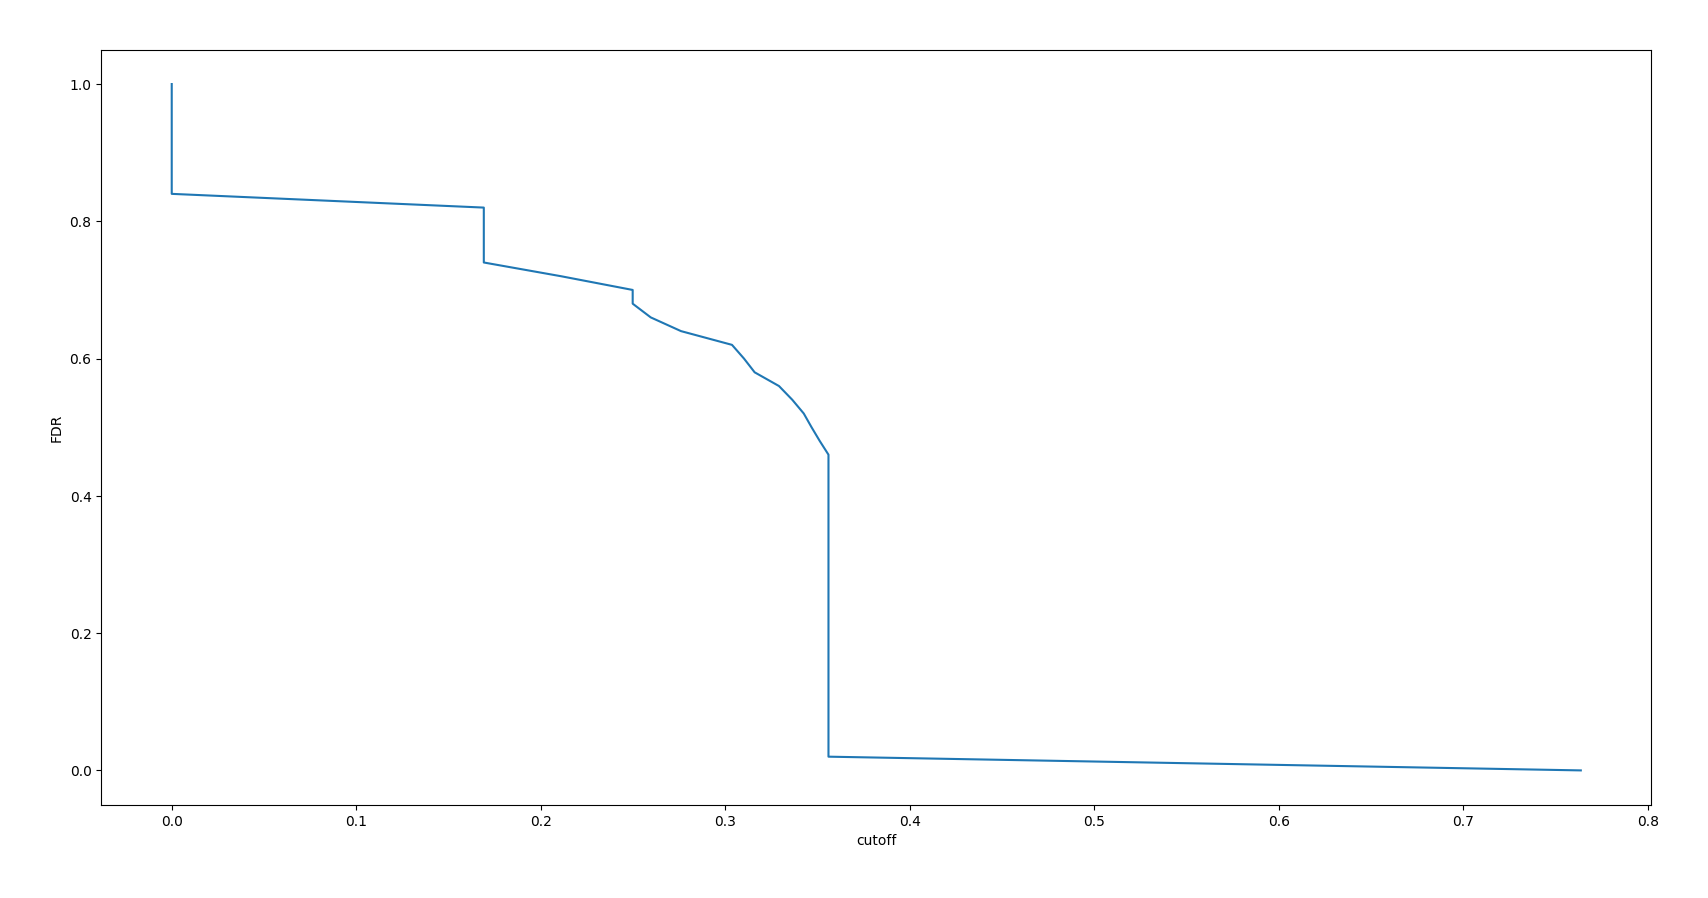

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10), dpi=100)
y = results2.index
x = results2.iloc[:,0]
plt.plot(x,y)
plt.xlabel("cutoff")
plt.ylabel("FDR")
plt.show()

### Effective Number of Sites
Even though most studies pointed to a small number of sites that can be predicted as type I or type II functional divergence-related, calculation of the average percentage of amino acid sites involved is problematic. From our preliminary analysis, we notice that, **after removing those predicted sites with the strongest signals, the functional divergence between duplicate genes for the rest of amino acid sites usually becomes trivial**. `diverge.Effective` is a rapid nonparametric function in diverge package to count the effective number of functional divergence-related sites, **which is insensitive to the cutoff**.
The effective number (ne) of functional divergence-related sites(F sites) is defined as the minimum number of sites, such that, **when they are removed, the coefficient of functional divergence for the rest of sites approaches to zero**.
Then effective number of sites with type I and type II can be get as follow, the results also show the theta and standard deviation of the sites. 
<br>
One thing to note is that **only two clusters** is needed in this function.

In [ ]:
from diverge import Effective
effective = Effective("./test_data/CASP.aln", "./test_data/cl1.tree", "./test_data/cl2.tree")
#theta and standard deviation of the sites
type1 = effective.type1_results
type2 = effective.type2_results
print("#"*30)
print("type1 theta and standard deviation of the sites")
print(type1)
print("type2 theta and standard deviation of the sites")
print(type2)

Type1 Effective Number of Sites is 8,Type2 Effective Number of Sites is 1
##############################
type1 theta and standard deviation of the sites
           Theta  Theta Standard Deviation
Number                                    
0       0.428730                  0.137802
1       0.370479                  0.139267
2       0.334288                  0.138666
3       0.296132                  0.137934
4       0.255828                  0.137054
5       0.216396                  0.136032
6       0.140873                  0.136226
7       0.039506                  0.139124
type2 theta and standard deviation of the sites
           Theta  Theta Standard Deviation
Number                                    
0       0.070351                  0.120187


### Functional Distance Analysis
The functional distance analysis in diverge package is designed for exploring  in which gene cluster the altered functional constraint took place after gene duplication. The 
analysis result, functional distance matrix, is based on the coefficient of type I functional divergence ($\theta_{ij}$) of each pair of clusters as follows:
$$
d_F(i, j)=-\ln \left(1-\theta_{i j}\right)
$$
In fact, it is a submodule of the `diverge.Gu99` function.

In [3]:
from diverge import Gu99
gu99 = Gu99("./test_data/CASP.aln","./test_data/cl1.tree","./test_data/cl2.tree","./test_data/cl3.tree")
gu99.fundist()

,0
cl1/cl2,0.544920
cl1/cl3,0.014973
cl2/cl3,0.215442


### Asymmetric Test for Type I
`diverge.Asym` is a rigorous statistical basis function to demonstrate the asymmetry of type I functional divergence. 
Suppose we test whether type I functional divergence is asymmetric between duplicate clusters 1 and 2, given a more ancient duplicate cluster 3 as outgroup. Let $\theta_{12}$, $\theta_{13}$, and $\theta_{23}$ be the coefficients of type I functional divergence between pair-wise duplicate clusters. 
Under the hypothesis of symmetry between duplicate clusters 1 and 2, we have the 
null $\theta_{12} = \theta_{13}$ and develop an approximate method to calculate the sampling variance of 
$\delta=\theta_{13}-\theta_{23}$, for testing whether the null hypothesis $\delta = 0$ can be statistically rejected.
<br>
One thing to note is that **just three clusters** is needed in this function.

In [ ]:
from diverge import Asym
asym = Asym("./test_data/CASP.aln","./test_data/cl1.tree","./test_data/cl2.tree","./test_data/cl3.tree")
asym.results

,Coefficient of Correlation of Theta,Delta Variation
Cluster Number of Outgroup,,
1,0.193815,0.034475
2,0.014862,0.049066
3,0.420112,0.031802


### Rate Variation among Sites (RVS)
`diverge.Rvs` function need to creat only one cluster, it can calculate rate variation among sites. Once the calculations are completed, the user can call `rvs.summary` to get the ML estimates result and the meaning of these results are as follow:
- Alpha: Gamma Shape Parameter
- D: Mean number of Substitutions
- N: Number of Sites

In [ ]:
from diverge import Rvs
rvs = Rvs("./test_data/CASP.aln","./test_data/cl1.tree")
rvs.summary

,cl1
Parameters,
Alpha,0.359880
D,0.710442
N,199.000000


The site-specific profile(s) can be get by `rvs.results`, which is the posterior probability of a site to be functional divergence-related. 
- XK: Number of Changes 
- RK: Posterior Mean of Evolutionary Rate

In [ ]:
rvs.results

,cl1_Xk,cl1_Rk
288,0.0,0.771595
289,0.0,0.771595
290,0.0,0.771595
291,0.0,0.771595
292,0.0,0.771595
...,...,...
566,0.0,0.771595
569,0.0,0.771595
570,0.0,0.771595
571,0.0,0.771595


### Super Cluster
The `SuperCluster` module is a powerful tool designed to automate the functional divergence analysis across all possible bipartitions of a given set of gene clusters. Instead of manually specifying every pair of clusters to compare, `SuperCluster` systematically generates these comparisons, reconstructs the necessary phylogenetic trees for each subgroup, and calculates the site-specific posterior probabilities for functional divergence.

This is particularly useful when you have multiple clades of interest (e.g., EGFR, ERBB2, ERBB3, ERBB4) and want to investigate the evolutionary functional shifts between any combination of them (e.g., {EGFR, ERBB2} vs. {ERBB3, ERBB4}).

In [ ]:
from diverge import SuperCluster

# Define the alignment file and the tree files for the initial clusters
aln_file = "./test_data/CASP.aln"
tree_files = [
    "./test_data/cl1.tree",
    "./test_data/cl2.tree",
    "./test_data/cl3.tree"
]

sc = SuperCluster(aln_file, *tree_files, sp_type=1, mode="Simple",parallel=True)

